## **Importamos las librerías necesarias**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## **Lectura de los archivos**

In [ ]:
archivos = [
    "UCSFFSL51ALL_DICT_05_04_16.csv",
    "UCSFFSL51_03_01_22_05Oct2023.csv",
    "UCSFFSL_02_01_16_05Oct2023.csv",
    "UCSFFSX51_11_08_19_05Oct2023.csv",
    "UCSFFSX6_08_17_22_05Oct2023.csv",
    "UCSFFSL51ALL_08_01_16.csv"
]

# Leer los datos de los archivos
lecturas = [pd.read_csv(archivo) for archivo in archivos]

# Unir los datos menos el diccionario
datos = pd.concat(lecturas[1:], ignore_index=True)
datos

,COLPROT,RID,VISCODE,VISCODE2,EXAMDATE,VERSION,LONISID,LONIUID,IMAGEUID,RUNDATE,...,ST79SV,ST81CV,ST81SA,ST81TA,ST81TS,ST86SA,ST87CV,ST92SV,IMAGETYPE,HIPPOQC
0,ADNI2,21,v11,m84,2012-10-04,2019-10-21,53048.0,169744.0,340931,2019-10-21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADNIGO,21,nv,m60,2010-10-08,2019-10-21,29253.0,93190.0,222684,2019-10-21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ADNI2,21,v06,m72,2011-10-13,2019-10-21,38511.0,125206.0,265250,2019-10-21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ADNI2,21,v21,m96,2013-10-17,2019-10-21,62148.0,204109.0,398269,2019-10-21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ADNI2,21,v41,m120,2015-11-03,2019-10-21,81324.0,299478.0,570703,2019-10-21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15660,ADNI2,5277,v21,m24,2015-09-02,2016-05-24,77714.0,271320.0,544727,2016-05-24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15661,ADNI2,5290,v02,scmri,2013-09-06,2016-05-24,61112.0,200104.0,391092,2016-05-24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15662,ADNI2,5290,v21,m24,2015-10-01,2016-05-24,79276.0,282402.0,557536,2016-05-24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15663,ADNI2,5292,v02,scmri,2013-10-18,2016-05-25,62175.0,204225.0,398341,2016-05-25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Añadimos otro df para incluir algunas variables que pueden ser interesantes

In [ ]:
# Leemos otro df que nos interesa
df_adnimerge = pd.read_csv('ADNIMERGE.csv')
# Cambiamos el nombre para las variables que nos interesa
df_mes = datos
#Creamos una nueva columna
df_adnimerge['VISCODE2'] = df_adnimerge['VISCODE']

#Pasamos a tipo fecha y hora
df_mes['EXAMDATE'] = pd.to_datetime(df_mes['EXAMDATE'])
df_adnimerge['EXAMDATE'] = pd.to_datetime(df_adnimerge['EXAMDATE'])

visit_dict = {'sc': 'bl',
              'scmri': 'bl',
              'bl': 'bl',
              'y2': 'm24',
              'y3': 'm36',
              'y1': 'm12',
              'f': pd.NA,
              }
months = [i for i in df_mes['VISCODE2'].unique() if i.startswith('m')]
final_visit_map = visit_dict | dict(zip(months, months))

df_mes['VISCODE2'] = df_mes['VISCODE2'].map(final_visit_map)

for row in df_mes.loc[df_mes.VISCODE2.isna()].itertuples(): #itera las filas cuando es nula
    time_diff = row.EXAMDATE - df_adnimerge.loc[(df_adnimerge.RID==row.RID),'EXAMDATE'] #calcula la diferencia de tiempo
    if time_diff.empty: # si está vacío lo marcamos (si está vacío no hay fechas que coincidan)
        df_mes.loc[row.Index, 'VISCODE2'] = pd.NA
        continue
    row_adnimerge = df_adnimerge.loc[abs(time_diff).idxmin(),] #diferencia de tiempo mínima
    df_mes.loc[row.Index, 'VISCODE2'] = row_adnimerge['VISCODE2'] #pone el valor correcto en df


variables = ['RID', 'VISCODE2', 'DX_bl', 'CDRSB', 'Month_bl', 'PTGENDER', 'PTEDUCAT', 'AGE', 'APOE4', 'DX']
df_merged_data = pd.merge(df_mes, df_adnimerge[variables], on=['RID', 'VISCODE2'], how='left')
df_merged_data = df_merged_data.loc[df_merged_data.Month_bl.isna()==False,].sort_values(["RID", "Month_bl"]) #elimina cuando month tiene valor faltante

df_merged_data.to_csv('df_merged_data.csv', index=False)

<ipython-input-212-2937907898>:2: DtypeWarning: Columns (19,20,21,50,51,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  df_adnimerge = pd.read_csv('ADNIMERGE.csv')


In [ ]:
df_merged_data = pd.read_csv('df_merged_data.csv')
df_merged_data

,COLPROT,RID,VISCODE,VISCODE2,EXAMDATE,VERSION,LONISID,LONIUID,IMAGEUID,RUNDATE,...,IMAGETYPE,HIPPOQC,DX_bl,CDRSB,Month_bl,PTGENDER,PTEDUCAT,AGE,APOE4,DX
0,NaN,3,sc,bl,2005-09-01,2009-07-01,1948.0,9127.0,32237,2009-07-01,...,NaN,NaN,AD,4.5,0.00000,Male,18.0,81.3,1.0,Dementia
1,NaN,3,m06,m06,2006-03-13,2009-07-01,4081.0,15240.0,31863,2009-07-01,...,NaN,NaN,AD,6.0,5.96721,Male,18.0,81.3,1.0,Dementia
2,NaN,3,m12,m12,2006-09-12,2009-07-01,5186.0,19096.0,35576,2009-07-01,...,NaN,NaN,AD,3.5,11.96720,Male,18.0,81.3,1.0,Dementia
3,NaN,3,m24,m24,2007-09-12,2009-07-02,11918.0,39296.0,88252,2009-07-02,...,NaN,NaN,AD,8.0,23.93440,Male,18.0,81.3,1.0,Dementia
4,NaN,4,sc,bl,2005-09-22,2009-08-24,1990.0,9234.0,64631,2009-08-24,...,NaN,NaN,LMCI,1.0,0.00000,Male,10.0,67.5,0.0,MCI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15474,ADNI3,7024,sc,bl,2021-11-04,2022-03-02,NaN,1079195.0,1512668,2022-03-02,...,NaN,NaN,SMC,0.0,0.00000,Male,20.0,73.9,NaN,CN
15475,ADNI3,7029,sc,bl,2022-01-10,2022-03-10,NaN,1095392.0,1532649,2022-03-10,...,NaN,Pass,EMCI,0.5,0.00000,Female,14.0,59.8,NaN,MCI
15476,ADNI3,7033,sc,bl,2022-01-03,2022-03-02,NaN,1092990.0,1529914,2022-03-02,...,NaN,NaN,AD,3.5,0.00000,Female,18.0,59.4,NaN,Dementia
15477,ADNI3,7048,sc,bl,2022-03-18,2022-05-19,NaN,1115524.0,1558064,2022-05-19,...,NaN,NaN,CN,0.0,0.00000,Female,14.0,61.8,NaN,CN


## Limpieza de datos

#### Primero comprobamos por encima de qué se trata este df

In [ ]:
df_merged_data.isna().sum()

,0
COLPROT,3569
RID,0
VISCODE,0
VISCODE2,0
EXAMDATE,0
...,...
PTGENDER,0
PTEDUCAT,0
AGE,7
APOE4,169


### - La variable OverallQC nos interesa porque indica la calidad de los datos

Comprobamos cuántos valores Null contiene la variable

In [ ]:
val_valores_nulos = df_merged_data['OVERALLQC'].isna().sum()

# Imprimir la cantidad de valores nulos en la columna específica
print(f"La columna '{'OVERALLQC'}' tiene {val_valores_nulos} valores nulos.")

La columna 'OVERALLQC' tiene 1784 valores nulos.


Observamos los valores que tiene y de qué tipo son

In [ ]:
val_valores_unicos = df_merged_data['OVERALLQC'].unique()
val_tipo_de_datos = df_merged_data['OVERALLQC'].dtype

# Observamos los valores únicos y el tipo de datos
print(f"Valores únicos en la columna 'overallqc': {val_valores_unicos}")
print(f"Tipo de datos en la columna 'overallqc': {val_tipo_de_datos}")

Valores únicos en la columna 'overallqc': ['Pass' 'Partial' 'Fail' nan 'Hippocampus Only' 'Hippoca']
Tipo de datos en la columna 'overallqc': object


Seleccionamos aquellas filas donde la variable OverallQC sea igual a Pass ya que indica que tiene todos los valores

In [ ]:
datos_filtrados = df_merged_data[(df_merged_data['OVERALLQC'] == 'Pass')]
datos_filtrados

,COLPROT,RID,VISCODE,VISCODE2,EXAMDATE,VERSION,LONISID,LONIUID,IMAGEUID,RUNDATE,...,IMAGETYPE,HIPPOQC,DX_bl,CDRSB,Month_bl,PTGENDER,PTEDUCAT,AGE,APOE4,DX
0,NaN,3,sc,bl,2005-09-01,2009-07-01,1948.0,9127.0,32237,2009-07-01,...,NaN,NaN,AD,4.5,0.0000,Male,18.0,81.3,1.0,Dementia
2,NaN,3,m12,m12,2006-09-12,2009-07-01,5186.0,19096.0,35576,2009-07-01,...,NaN,NaN,AD,3.5,11.9672,Male,18.0,81.3,1.0,Dementia
4,NaN,4,sc,bl,2005-09-22,2009-08-24,1990.0,9234.0,64631,2009-08-24,...,NaN,NaN,LMCI,1.0,0.0000,Male,10.0,67.5,0.0,MCI
5,NaN,4,m06,m06,2006-05-25,2009-08-24,4007.0,14969.0,64636,2009-08-24,...,NaN,NaN,LMCI,0.5,5.7377,Male,10.0,67.5,0.0,MCI
6,NaN,4,m12,m12,2006-11-28,2009-08-24,6078.0,23080.0,59357,2009-08-24,...,NaN,NaN,LMCI,1.0,12.1639,Male,10.0,67.5,0.0,MCI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15464,ADNI3,7003,sc,bl,2021-09-20,2021-10-26,NaN,1064422.0,1494216,2021-10-26,...,NaN,Pass,AD,6.0,0.0000,Female,14.0,82.0,NaN,Dementia
15466,ADNI3,7007,sc,bl,2021-09-29,2021-12-15,NaN,1068461.0,1498938,2021-12-15,...,NaN,Pass,LMCI,1.5,0.0000,Female,14.0,71.9,NaN,MCI
15468,ADNI3,7010,sc,bl,2021-09-23,2021-10-26,NaN,1065803.0,1495816,2021-10-26,...,NaN,Pass,SMC,0.5,0.0000,Male,18.0,59.3,NaN,CN
15470,ADNI3,7013,sc,bl,2021-10-28,2022-03-21,NaN,1077377.0,1510290,2022-03-21,...,NaN,Pass,EMCI,0.5,0.0000,Female,16.0,82.1,NaN,MCI


### Observamos los valores faltantes

In [ ]:
print("Cantidad de datos nulos por filas (ordenados de mayor a menor):")
print(datos_filtrados.isna().sum(axis=1).sort_values(ascending=False))

print("\nCantidad de datos nulos por columnas (ordenados de mayor a menor):")
print(datos_filtrados.isna().sum(axis=0).sort_values(ascending=False))

Cantidad de datos nulos por filas (ordenados de mayor a menor):
15420    66
15415    66
15241    66
15328    66
14916    66
         ..
7666     42
9328     42
9334     42
9339     42
9341     42
Length: 10338, dtype: int64

Cantidad de datos nulos por columnas (ordenados de mayor a menor):
ST67SV     10338
ST100SV    10338
ST122SV    10338
ST87CV     10338
ST63SV     10338
           ...  
ST54SA         0
ST53SV         0
ST52CV         0
ST52TS         0
ST56TA         0
Length: 415, dtype: int64


In [ ]:
# Obtener un diccionario con la cantidad de valores nulos por columna
valores_nulos_por_columna = datos_filtrados.isna().sum().to_dict()

# Ordenar el diccionario de mayor a menor
valores_nulos_por_columna_ordenado = dict(sorted(valores_nulos_por_columna.items(), key=lambda x: x[1], reverse=True))

# Imprimir el diccionario ordenado
print("Valores nulos por columna (ordenado de mayor a menor):")
print(valores_nulos_por_columna_ordenado)

Valores nulos por columna (ordenado de mayor a menor):
{'ST100SV': 10338, 'ST122SV': 10338, 'ST126SV': 10338, 'ST22CV': 10338, 'ST22SA': 10338, 'ST22TA': 10338, 'ST22TS': 10338, 'ST28CV': 10338, 'ST33SV': 10338, 'ST41SV': 10338, 'ST63SV': 10338, 'ST67SV': 10338, 'ST81CV': 10338, 'ST81SA': 10338, 'ST81TA': 10338, 'ST81TS': 10338, 'ST87CV': 10338, 'ST92SV': 10338, 'HIPPOQC': 9164, 'LHIPQC': 8084, 'RHIPQC': 8084, 'FLDSTRENG': 7773, 'BASETP1': 7773, 'BASETP2': 7773, 'BASETP3': 7773, 'BASETP4': 7773, 'BASETP5': 7773, 'BASETP6': 7773, 'BASETP7': 7773, 'BASETP8': 7773, 'ST123CV': 7773, 'ST123SA': 7773, 'ST123TA': 7773, 'ST123TS': 7773, 'ST19SV': 7773, 'ST20SV': 7773, 'ST27SA': 7773, 'ST64CV': 7773, 'ST64SA': 7773, 'ST64TA': 7773, 'ST64TS': 7773, 'ST78SV': 7773, 'ST79SV': 7773, 'ST86SA': 7773, 'IMAGETYPE': 6945, 'ST8SV': 4616, 'ST131HS': 3744, 'ST132HS': 3744, 'ST133HS': 3744, 'ST134HS': 3744, 'ST135HS': 3744, 'ST136HS': 3744, 'ST137HS': 3744, 'ST138HS': 3744, 'ST139HS': 3744, 'ST140HS': 3744,

Añadimos nombres a las filas

In [ ]:
nombres_filas = ['Fila_' + str(i) for i in range(len(datos_filtrados))]

# Asignar los nombres de fila automáticamente al DataFrame
datos_filtrados.index = nombres_filas

## - Seleccionamos las que tengan menos del 10% de valores faltantes

In [ ]:
# Calcula el número total de filas en tus datos
total_filas = datos_filtrados.shape[0]

# Calcula el porcentaje de nulos por columna
porcentaje_nulos = (datos_filtrados.isna().sum() / total_filas) * 100

# Filtra las columnas que tienen menos del 10% de valores faltantes
df_sin_null = datos_filtrados.columns[porcentaje_nulos < 10]

# Filtra el DataFrame original con las columnas seleccionadas
df_filtrado = datos_filtrados[df_sin_null]
df_filtrado

,RID,VISCODE,VISCODE2,EXAMDATE,VERSION,LONIUID,IMAGEUID,RUNDATE,STATUS,OVERALLQC,...,ST130TA,ST130TS,ST130CV,update_stamp,DX_bl,Month_bl,PTGENDER,PTEDUCAT,AGE,APOE4
Fila_0,3,sc,bl,2005-09-01,2009-07-01,9127.0,32237,2009-07-01,complete,Pass,...,2.547,0.845,5803.0,2016-02-02 09:33:37.0,AD,0.0000,Male,18.0,81.3,1.0
Fila_1,3,m12,m12,2006-09-12,2009-07-01,19096.0,35576,2009-07-01,complete,Pass,...,2.486,0.841,5578.0,2016-02-02 09:33:37.0,AD,11.9672,Male,18.0,81.3,1.0
Fila_2,4,sc,bl,2005-09-22,2009-08-24,9234.0,64631,2009-08-24,complete,Pass,...,2.977,0.911,6399.0,2016-02-02 09:33:37.0,LMCI,0.0000,Male,10.0,67.5,0.0
Fila_3,4,m06,m06,2006-05-25,2009-08-24,14969.0,64636,2009-08-24,complete,Pass,...,2.957,0.913,6157.0,2016-02-02 09:33:37.0,LMCI,5.7377,Male,10.0,67.5,0.0
Fila_4,4,m12,m12,2006-11-28,2009-08-24,23080.0,59357,2009-08-24,complete,Pass,...,2.923,0.955,6008.0,2016-02-02 09:33:37.0,LMCI,12.1639,Male,10.0,67.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fila_10333,7003,sc,bl,2021-09-20,2021-10-26,1064422.0,1494216,2021-10-26,complete,Pass,...,2.535,0.733,5405.0,2022-08-26 14:42:03.0,AD,0.0000,Female,14.0,82.0,NaN
Fila_10334,7007,sc,bl,2021-09-29,2021-12-15,1068461.0,1498938,2021-12-15,complete,Pass,...,2.822,0.892,6794.0,2022-08-26 14:42:03.0,LMCI,0.0000,Female,14.0,71.9,NaN
Fila_10335,7010,sc,bl,2021-09-23,2021-10-26,1065803.0,1495816,2021-10-26,complete,Pass,...,2.989,0.750,7283.0,2022-08-26 14:42:03.0,SMC,0.0000,Male,18.0,59.3,NaN
Fila_10336,7013,sc,bl,2021-10-28,2022-03-21,1077377.0,1510290,2022-03-21,complete,Pass,...,2.445,0.978,6896.0,2022-08-26 14:42:03.0,EMCI,0.0000,Female,16.0,82.1,NaN


Algunas columnas se han eliminado pero vamos a añadir la columna que s¡es de interés

In [ ]:
df_filtrado['CDRSB'] = datos_filtrados['CDRSB']

<ipython-input-222-181015492>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['CDRSB'] = datos_filtrados['CDRSB']


Estuadiamos el df que no tenga valores faltantes

In [ ]:
# Esta son las variables con menos del 10% de valores faltantes
print(df_sin_null)

Index(['RID', 'VISCODE', 'VISCODE2', 'EXAMDATE', 'VERSION', 'LONIUID',
       'IMAGEUID', 'RUNDATE', 'STATUS', 'OVERALLQC',
       ...
       'ST130TA', 'ST130TS', 'ST130CV', 'update_stamp', 'DX_bl', 'Month_bl',
       'PTGENDER', 'PTEDUCAT', 'AGE', 'APOE4'],
      dtype='object', length=337)


Es decir, de 415 variables tenemos 337 con menos de 10% de valores faltantes.

#### Verificamos

In [ ]:
# Obtenemos la cantidad de valores nulos en cada columna y fila así:
valores_nulos_columnas = df_filtrado.isna().sum()
valores_nulos_filas = df_filtrado.isna().sum(axis=1)

# Imprimir los valores nulos en cada columna
print("Valores nulos por columna:")
print(valores_nulos_columnas)

# Imprimir los valores nulos en cada fila
print("\nValores nulos por fila:")
print(valores_nulos_filas)

Valores nulos por columna:
RID            0
VISCODE        0
VISCODE2       0
EXAMDATE       0
VERSION        0
            ... 
PTGENDER       0
PTEDUCAT       0
AGE            4
APOE4         94
CDRSB       1382
Length: 338, dtype: int64

Valores nulos por fila:
Fila_0        0
Fila_1        0
Fila_2        0
Fila_3        0
Fila_4        0
             ..
Fila_10333    1
Fila_10334    1
Fila_10335    1
Fila_10336    1
Fila_10337    1
Length: 10338, dtype: int64


In [ ]:
#Ahora lo comprobaremos solo para las columnas que tienen algún valor nulo
columnas_con_nulos = df_filtrado.columns[df_filtrado.isna().any()]

# Imprimir las columnas con al menos un valor nulo
print("Columnas con al menos un valor nulo:")
print(columnas_con_nulos)

# También puedes imprimir los valores nulos en esas columnas
valores_nulos_en_columnas_con_nulos = df_filtrado[columnas_con_nulos].isna().sum()
print("\nValores nulos en las columnas con al menos un valor nulo:")
print(valores_nulos_en_columnas_con_nulos)

Columnas con al menos un valor nulo:
Index(['LONIUID', 'ST66SV', 'ST89SV', 'ST125SV', 'DX_bl', 'AGE', 'APOE4',
       'CDRSB'],
      dtype='object')

Valores nulos en las columnas con al menos un valor nulo:
LONIUID      88
ST66SV       85
ST89SV        1
ST125SV     113
DX_bl         5
AGE           4
APOE4        94
CDRSB      1382
dtype: int64


#### Ahora visualizamos los df cuando hemos hecho la limpieza de los datos

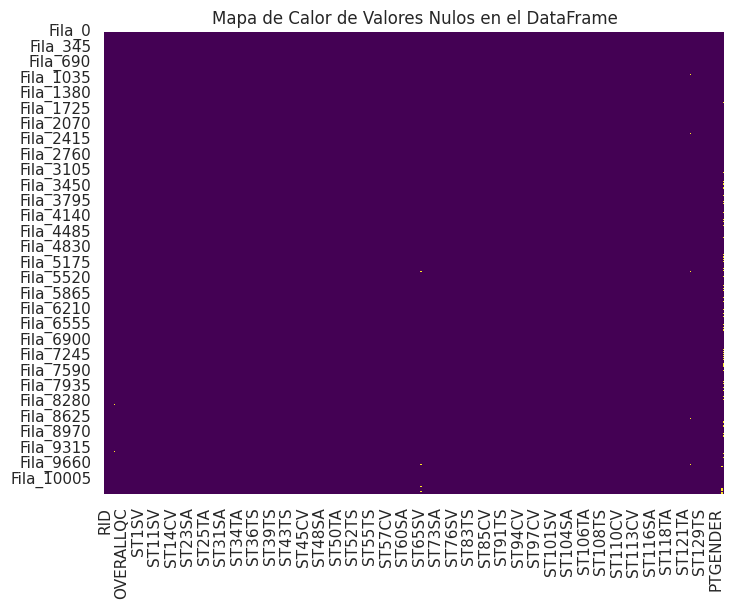

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_filtrado.isna(), cmap='viridis', cbar=False)

plt.title('Mapa de Calor de Valores Nulos en el DataFrame')
plt.show()

Al igual que sabíamos antes, podemos comprobar como hay muy pocos valores nulos

# Observamos los duplicados
#### Primero de todo comprobamos cuál es el máximo de duplicados de una fila

In [ ]:
df_group = df_filtrado.groupby(['RID', 'VISCODE2']).count()

In [ ]:
df_group.max()

,0
VISCODE,4
EXAMDATE,4
VERSION,4
LONIUID,4
IMAGEUID,4
...,...
PTGENDER,4
PTEDUCAT,4
AGE,4
APOE4,4


Por tanto, concluimos que el número máximo de repeticiones son 4. Aún así, la condición la haremos para cualquier repetición, ya sea que se repita una vez o cuatro.

In [ ]:
datos_duplicados = df_filtrado.groupby(['RID', 'VISCODE2']).count().loc[(df_filtrado.groupby(['RID', 'VISCODE2']).count()>1).any(axis=1).values]
datos_duplicados

VISCODE  EXAMDATE  VERSION  LONIUID  IMAGEUID  RUNDATE  STATUS  \
RID  VISCODE2                                                                   
21   m120            2         2        2        2         2        2       2   
     m60             3         3        3        3         3        3       3   
     m72             2         2        2        2         2        2       2   
     m84             2         2        2        2         2        2       2   
23   m48             2         2        2        2         2        2       2   
...                ...       ...      ...      ...       ...      ...     ...   
6690 bl              2         2        2        2         2        2       2   
6702 bl              2         2        2        2         2        2       2   
6703 bl              2         2        2        2         2        2       2   
6735 bl              2         2        2        2         2        2       2   
6844 bl              2         2        2        2         2        2       2   

               OVERALLQC  TEMPQC  FRONTQC  ...  ST130TS  ST130CV  \
RID  VISCODE2                              ...                     
21   m120              2       2        2  ...        2        2   
     m60               3       3        3  ...        3        3   
     m72               2       2        2  ...        2        2   
     m84               2       2        2  ...        2        2   
23   m48               2       2        2  ...        2        2   
...                  ...     ...      ...  ...      ...      ...   
6690 bl                2       2        2  ...        2        2   
6702 bl                2       2        2  ...        2        2   
6703 bl                2       2        2  ...        2        2   
6735 bl                2       2        2  ...        2        2   
6844 bl                2       2        2  ...        2        2   

               update_stamp  DX_bl  Month_bl  PTGENDER  PTEDUCAT  AGE  APOE4  \
RID  VISCODE2                                                                  
21   m120                 2      2         2         2         2    2      2   
     m60                  3      3         3         3         3    3      3   
     m72                  2      2         2         2         2    2      2   
     m84                  2      2         2         2         2    2      2   
23   m48                  2      2         2         2         2    2      2   
...                     ...    ...       ...       ...       ...  ...    ...   
6690 bl                   2      2         2         2         2    2      2   
6702 bl                   2      2         2         2         2    2      2   
6703 bl                   2      2         2         2         2    2      2   
6735 bl                   2      2         2         2         2    2      2   
6844 bl                   2      2         2         2         2    2      0   

               CDRSB  
RID  VISCODE2         
21   m120          2  
     m60           3  
     m72           2  
     m84           2  
23   m48           2  
...              ...  
6690 bl            2  
6702 bl            2  
6703 bl            2  
6735 bl            2  
6844 bl            2  

[2497 rows x 336 columns]

En este caso hemos obtenido que hay 2497 filas donde se duplican las filas, elegimos la más actual.

In [ ]:
df_group = df_filtrado.sort_values(['RUNDATE', 'update_stamp'], ascending=False).groupby(['RID', 'VISCODE2']).head(1)
df_group

,RID,VISCODE,VISCODE2,EXAMDATE,VERSION,LONIUID,IMAGEUID,RUNDATE,STATUS,OVERALLQC,...,ST130TS,ST130CV,update_stamp,DX_bl,Month_bl,PTGENDER,PTEDUCAT,AGE,APOE4,CDRSB
Fila_10043,6462,sc,bl,2018-10-04,2022-06-09,736402.0,1060030,2022-06-09,complete,Pass,...,0.708,5994.0,2022-08-26 14:42:02.0,SMC,0.0000,Male,17.0,69.7,1.0,0.0
Fila_10092,6528,sc,bl,2018-08-08,2022-04-21,714456.0,1033265,2022-04-21,complete,Pass,...,0.751,6788.0,2022-08-26 14:42:02.0,CN,0.0000,Female,16.0,65.1,1.0,0.0
Fila_5976,4332,y2,m96,2019-09-23,2022-04-21,878805.0,1233982,2022-04-21,complete,Pass,...,0.827,7106.0,2022-08-26 14:42:00.0,EMCI,93.4098,Male,14.0,69.0,0.0,0.0
Fila_3920,2304,v52,m78,2017-09-05,2022-04-15,606257.0,901163,2022-04-15,complete,Pass,...,0.783,7193.0,2022-08-26 14:42:00.0,EMCI,77.0492,Male,17.0,61.3,0.0,0.5
Fila_9577,5259,y2,m72,2019-10-30,2022-04-14,892723.0,1250808,2022-04-14,complete,Pass,...,0.773,6430.0,2022-08-26 14:42:01.0,SMC,74.0984,Female,18.0,78.8,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fila_24,10,m24,m24,2007-11-07,2009-07-01,45942.0,94377,2009-07-01,complete,Pass,...,0.971,5429.0,2016-02-02 09:33:37.0,AD,23.8361,Female,12.0,73.9,1.0,5.0
Fila_57,22,sc,bl,2005-10-10,2009-07-01,9617.0,32389,2009-07-01,complete,Pass,...,0.876,5333.0,2016-02-02 09:33:37.0,CN,0.0000,Male,17.0,63.2,1.0,0.0
Fila_58,22,m06,m06,2006-04-20,2009-07-01,15232.0,31979,2009-07-01,complete,Pass,...,0.861,5226.0,2016-02-02 09:33:37.0,CN,6.0000,Male,17.0,63.2,1.0,0.0
Fila_59,22,m12,m12,2006-10-19,2009-07-01,20820.0,65883,2009-07-01,complete,Pass,...,0.864,5285.0,2016-02-02 09:33:37.0,CN,11.9672,Male,17.0,63.2,1.0,0.0


Eliminamos algunas columnas que sabemos que no son interesantes y guardamos en una variable

In [ ]:
df_limpio = [col for col in df_group.columns if col not in ['LONIUID', 'IMAGEUID']]

df = df_group[df_limpio]
df.to_csv('df.csv', index=False)

Ahora comprobamos cuántas personas tenemos

In [ ]:
df = pd.read_csv('df.csv')

In [ ]:
df_personas = df.groupby('RID').head(1)
df_personas

,RID,VISCODE,VISCODE2,EXAMDATE,VERSION,RUNDATE,STATUS,OVERALLQC,TEMPQC,FRONTQC,...,ST130TS,ST130CV,update_stamp,DX_bl,Month_bl,PTGENDER,PTEDUCAT,AGE,APOE4,CDRSB
0,6462,sc,bl,2018-10-04,2022-06-09,2022-06-09,complete,Pass,Pass,Pass,...,0.708,5994.0,2022-08-26 14:42:02.0,SMC,0.0000,Male,17.0,69.7,1.0,0.0
1,6528,sc,bl,2018-08-08,2022-04-21,2022-04-21,complete,Pass,Pass,Pass,...,0.751,6788.0,2022-08-26 14:42:02.0,CN,0.0000,Female,16.0,65.1,1.0,0.0
2,4332,y2,m96,2019-09-23,2022-04-21,2022-04-21,complete,Pass,Pass,Pass,...,0.827,7106.0,2022-08-26 14:42:00.0,EMCI,93.4098,Male,14.0,69.0,0.0,0.0
3,2304,v52,m78,2017-09-05,2022-04-15,2022-04-15,complete,Pass,Pass,Pass,...,0.783,7193.0,2022-08-26 14:42:00.0,EMCI,77.0492,Male,17.0,61.3,0.0,0.5
4,5259,y2,m72,2019-10-30,2022-04-14,2022-04-14,complete,Pass,Pass,Pass,...,0.773,6430.0,2022-08-26 14:42:01.0,SMC,74.0984,Female,18.0,78.8,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7365,53,sc,bl,2005-11-14,2009-07-01,2009-07-01,complete,Pass,Pass,Pass,...,0.950,5174.0,2016-02-02 09:33:38.0,AD,0.0000,Male,12.0,80.1,0.0,4.0
7366,67,sc,bl,2005-11-30,2009-07-01,2009-07-01,complete,Pass,Pass,Pass,...,0.933,5698.0,2016-02-02 09:33:38.0,CN,0.0000,Male,17.0,74.5,0.0,0.0
7370,3,sc,bl,2005-09-01,2009-07-01,2009-07-01,complete,Pass,Pass,Pass,...,0.845,5803.0,2016-02-02 09:33:37.0,AD,0.0000,Male,18.0,81.3,1.0,4.5
7372,10,sc,bl,2005-11-07,2009-07-01,2009-07-01,complete,Pass,Pass,Pass,...,0.917,5584.0,2016-02-02 09:33:37.0,AD,0.0000,Female,12.0,73.9,1.0,5.0


In [ ]:
filas_unicas_RID = df['RID'].nunique()

print("Número de filas únicas en la columna 'RID':", filas_unicas_RID)

Número de filas únicas en la columna 'RID': 1993


Ahora veremos cuántas veces ha ido cada persona

In [ ]:
conteo_valores = df['RID'].value_counts()

# Convierte la serie en un DataFrame y renombra las columnas
conteo_df = conteo_valores.reset_index()
conteo_df.columns = ['Individuo', 'Visitas']

# Imprime el DataFrame resultante
conteo_df

,Individuo,Visitas
0,413,13
1,1261,13
2,1155,13
3,2234,11
4,1280,11
...,...,...
1988,4186,1
1989,53,1
1990,6533,1
1991,6375,1


Datos Finales

In [ ]:
# Conteo de sujetos por valor de APOE4
print("Distribución APOE4:")
print(df['APOE4'].value_counts(dropna=False))

# Conteo de sujetos por diagnóstico basal
print("\nDistribución DX_bl:")
print(df['DX_bl'].value_counts(dropna=False))

# Conteo por sexo
print("\nDistribución por sexo:")
print(df['PTGENDER'].value_counts(dropna=False))

# Conteo de sujetos por valor de APOE4
print("Distribución años de eduación:")
print(df['PTEDUCAT'].value_counts(dropna=False))

# Conteo de sujetos por diagnóstico basal
print("\nDistribución por Edad:")
print(df['AGE'].value_counts(dropna=False))


Distribución APOE4:
APOE4
0.0    3989
1.0    2628
2.0     670
NaN      92
Name: count, dtype: int64

Distribución DX_bl:
DX_bl
LMCI    2309
CN      1998
EMCI    1638
AD       843
SMC      586
NaN        5
Name: count, dtype: int64

Distribución por sexo:
PTGENDER
Male      3869
Female    3510
Name: count, dtype: int64
Distribución años de eduación:
PTEDUCAT
16.0    1771
18.0    1431
20.0     990
12.0     842
14.0     817
13.0     380
19.0     358
17.0     318
15.0     282
10.0      56
8.0       48
11.0      35
9.0       25
6.0       13
7.0       11
4.0        2
Name: count, dtype: int64

Distribución por Edad:
AGE
70.6    74
72.6    73
70.9    73
65.1    73
76.4    65
        ..
87.5     1
90.0     1
60.9     1
88.1     1
87.6     1
Name: count, Length: 335, dtype: int64


In [ ]:
# Agrupamos por RID y tomamos la primera fila de cada sujeto
df_unique = df.groupby('RID').first()

# Conteo de sujetos únicos por valor de APOE4
print("Distribución APOE4:")
print(df_unique['APOE4'].value_counts(dropna=False))

# Conteo de sujetos únicos por diagnóstico basal
print("\nDistribución DX_bl:")
print(df_unique['DX_bl'].value_counts(dropna=False))

# Conteo de sujetos únicos por sexo
print("\nDistribución por sexo:")
print(df_unique['PTGENDER'].value_counts(dropna=False))

# Conteo de sujetos únicos por años de educación
print("\nDistribución años de educación:")
print(df_unique['PTEDUCAT'].value_counts(dropna=False))

# Conteo de sujetos únicos por edad
print("\nDistribución por edad:")
print(df_unique['AGE'].value_counts(dropna=False))


Distribución APOE4:
APOE4
0.0    1037
1.0     694
2.0     176
NaN      86
Name: count, dtype: int64

Distribución DX_bl:
DX_bl
LMCI    561
CN      481
EMCI    369
AD      303
SMC     274
None      5
Name: count, dtype: int64

Distribución por sexo:
PTGENDER
Male      1024
Female     969
Name: count, dtype: int64

Distribución años de educación:
PTEDUCAT
16.0    486
18.0    392
20.0    266
14.0    224
12.0    222
19.0     97
17.0     87
13.0     87
15.0     79
10.0     17
8.0      11
11.0     10
9.0       6
7.0       5
6.0       3
4.0       1
Name: count, dtype: int64

Distribución por edad:
AGE
76.4    18
69.3    17
72.8    16
71.4    16
75.8    15
        ..
87.5     1
90.0     1
57.5     1
54.8     1
52.7     1
Name: count, Length: 335, dtype: int64


In [ ]:
# Verificar las columnas disponibles
columns = df.columns.tolist()

# Buscar columnas que incluyan los términos 'CV', 'SV', 'TA', 'SA'
column_matches = [col for col in columns if any(x in col.upper() for x in ['CV', 'SV', 'TA', 'SA'])]

# Contar cuántas columnas contienen cada tipo
cv_count = sum('CV' in col.upper() for col in column_matches)
sv_count = sum('SV' in col.upper() for col in column_matches)
ta_count = sum('TA' in col.upper() for col in column_matches)
sa_count = sum('SA' in col.upper() for col in column_matches)

cv_count, sv_count, ta_count, sa_count

(69, 39, 70, 68)

In [ ]:
# Asegurar que DX_bl esté como categoría
df['DX_bl'] = df['DX_bl'].astype('category')
df['APOE4'] = df['APOE4'].astype('category')

# Verificar algunas columnas relevantes para elegir ejemplos representativos
columnas = df.columns.tolist()

# Buscar columnas por tipo (CV, SV, TA, SA) para elegir una de cada tipo
cv_cols = [col for col in df.columns if 'CV' in col]
sv_cols = [col for col in df.columns if 'SV' in col]
ta_cols = [col for col in df.columns if col.startswith('ST') and 'TA' in col and 'status' not in col.lower()]
sa_cols = [col for col in df.columns if 'SA' in col]

# Elegimos una columna representativa de cada tipo
var_cv = cv_cols[0] if cv_cols else None
var_sv = sv_cols[0] if sv_cols else None
var_ta = ta_cols[0] if ta_cols else None
var_sa = sa_cols[0] if sa_cols else None

(var_cv, var_sv, var_ta, var_sa)


('ST10CV', 'ST1SV', 'ST13TA', 'ST13SA')

In [ ]:
# Variables válidas para graficar
variables = {
    "Volumen Cortical (CV)": "ST10CV",
    "Volumen Subcortical (SV)": "ST1SV",
    "Espesor Cortical (TA)": "ST13TA",
    "Área Superficial (SA)": "ST13SA"
}


plt.figure(figsize=(12, 10))
for i, (label, var) in enumerate(variables.items(), 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x="APOE4", y=var)
    plt.title(label)
    plt.xlabel("Número de copias APOE4")
    plt.ylabel("Valor")

plt.suptitle("Distribución de medidas morfológicas por genotipo APOE4", fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98])  # Deja espacio para el título superior

# Guardar como archivo PNG
output_path = "boxplots_apoe4_limpieza.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.close()

output_path


'boxplots_apoe4_limpieza.png'

In [ ]:
# Generar y guardar los boxplots corregidos con variables válidas
plt.figure(figsize=(12, 10))
for i, (label, var) in enumerate(variables.items(), 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x="DX_bl", y=var)
    plt.title(label)
    plt.xlabel("Diagnóstico basal")
    plt.ylabel("Valor")

plt.suptitle("Distribución de medidas morfológicas por diagnóstico basal", fontsize=16, y=1.05)
plt.tight_layout()

# Guardar como archivo PNG
output_path = "boxplots_dx_bl_limpieza.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.close()

output_path


'boxplots_dx_bl_limpieza.png'

In [ ]:
#APOE4
for nombre, var in variables.items():
    print(f"\nEstadísticos para {nombre} ({var}) por APOE4:")
    display(df.groupby('APOE4')[var].agg(['mean', 'std', 'var', 'min', 'max']).round(2))


Estadísticos para Volumen Cortical (CV) (ST10CV) por APOE4:


<ipython-input-241-4120479677>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df.groupby('APOE4')[var].agg(['mean', 'std', 'var', 'min', 'max']).round(2))


,mean,std,var,min,max
APOE4,,,,,
0.0,1512964.63,157210.02,2.471499e+10,1071904.47,2135391.15
1.0,1511235.87,163463.88,2.672044e+10,1140966.17,2906232.18
2.0,1528100.21,170392.02,2.903344e+10,1202984.53,3315208.16



Estadísticos para Volumen Subcortical (SV) (ST1SV) por APOE4:


<ipython-input-241-4120479677>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df.groupby('APOE4')[var].agg(['mean', 'std', 'var', 'min', 'max']).round(2))


,mean,std,var,min,max
APOE4,,,,,
0.0,20772.15,2451.56,6010170.17,13925.0,31375.4
1.0,20892.21,2350.15,5523188.90,14255.0,33268.0
2.0,21414.79,2368.14,5608075.93,13821.0,33846.3



Estadísticos para Espesor Cortical (TA) (ST13TA) por APOE4:


<ipython-input-241-4120479677>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df.groupby('APOE4')[var].agg(['mean', 'std', 'var', 'min', 'max']).round(2))


,mean,std,var,min,max
APOE4,,,,,
0.0,2.31,0.22,0.05,1.30,3.09
1.0,2.26,0.25,0.06,1.31,2.89
2.0,2.22,0.26,0.07,1.43,2.90



Estadísticos para Área Superficial (SA) (ST13SA) por APOE4:


<ipython-input-241-4120479677>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df.groupby('APOE4')[var].agg(['mean', 'std', 'var', 'min', 'max']).round(2))


,mean,std,var,min,max
APOE4,,,,,
0.0,983.67,171.94,29562.49,560.0,1667.0
1.0,970.42,174.66,30505.69,554.0,1836.0
2.0,990.16,199.63,39851.30,509.0,1858.0


In [ ]:
#DX_bl
for nombre, var in variables.items():
    print(f"\nEstadísticos para {nombre} ({var}) por DX_bl:")
    display(df.groupby('DX_bl')[var].agg(['mean', 'std', 'var', 'min', 'max']).round(2))



Estadísticos para Volumen Cortical (CV) (ST10CV) por DX_bl:


<ipython-input-242-3414118609>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df.groupby('DX_bl')[var].agg(['mean', 'std', 'var', 'min', 'max']).round(2))


,mean,std,var,min,max
DX_bl,,,,,
AD,1513150.30,183024.58,3.349800e+10,1071904.47,3315208.16
CN,1497394.93,155940.76,2.431752e+10,1107309.07,2906232.18
EMCI,1506348.91,150990.82,2.279823e+10,1150582.87,2135391.15
LMCI,1542501.17,162704.63,2.647280e+10,1131327.48,2110290.00
SMC,1463440.52,142555.10,2.032196e+10,1140966.17,1998250.00



Estadísticos para Volumen Subcortical (SV) (ST1SV) por DX_bl:


<ipython-input-242-3414118609>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df.groupby('DX_bl')[var].agg(['mean', 'std', 'var', 'min', 'max']).round(2))


,mean,std,var,min,max
DX_bl,,,,,
AD,20543.76,2439.84,5952811.35,13821.0,28908.0
CN,20664.33,2352.21,5532870.95,13925.0,31375.4
EMCI,21258.54,2325.18,5406443.81,14633.5,33846.3
LMCI,20920.54,2541.78,6460647.04,14797.8,33268.0
SMC,20749.58,2139.66,4578126.63,14799.3,28778.3



Estadísticos para Espesor Cortical (TA) (ST13TA) por DX_bl:


<ipython-input-242-3414118609>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df.groupby('DX_bl')[var].agg(['mean', 'std', 'var', 'min', 'max']).round(2))


,mean,std,var,min,max
DX_bl,,,,,
AD,2.12,0.26,0.07,1.34,2.90
CN,2.33,0.20,0.04,1.59,2.94
EMCI,2.40,0.18,0.03,1.71,3.09
LMCI,2.21,0.25,0.06,1.30,2.96
SMC,2.40,0.16,0.03,1.93,3.01



Estadísticos para Área Superficial (SA) (ST13SA) por DX_bl:


<ipython-input-242-3414118609>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df.groupby('DX_bl')[var].agg(['mean', 'std', 'var', 'min', 'max']).round(2))


,mean,std,var,min,max
DX_bl,,,,,
AD,939.21,186.08,34627.37,509.0,1719.0
CN,985.60,177.42,31478.76,552.0,1633.0
EMCI,985.90,162.05,26259.38,480.0,1714.0
LMCI,992.60,181.56,32962.55,595.0,1858.0
SMC,935.44,154.58,23895.38,573.0,1509.0


In [ ]:
# Estadísticos por diagnóstico
#print(df.groupby('DX_bl')[['AGE', 'PTEDUCAT', 'PTGENDER']].describe())
print(df.groupby('DX_bl')[['AGE']].describe())
print(df.groupby('DX_bl')[['PTEDUCAT']].describe())
print(df.groupby('DX_bl')[['PTGENDER']].describe())

# Estadísticos por APOE4
print(df.groupby('APOE4')[['AGE']].describe())
print(df.groupby('APOE4')[['PTEDUCAT']].describe())
print(df.groupby('APOE4')[['PTGENDER']].describe())

# Tabla cruzada
print(pd.crosstab(df['DX_bl'], df['APOE4']))

          AGE                                                     
        count       mean       std   min     25%   50%   75%   max
DX_bl                                                             
AD      843.0  74.332384  8.031361  55.3  69.500  74.4  80.1  90.9
CN     1998.0  73.739640  5.734648  55.1  70.300  73.1  77.5  89.6
EMCI   1636.0  70.514853  7.096246  55.0  65.275  70.2  75.5  89.1
LMCI   2307.0  72.905592  7.413258  55.0  68.300  73.5  78.5  91.4
SMC     586.0  70.967918  5.886838  52.7  66.825  69.6  75.3  90.1
      PTEDUCAT                                                   
         count       mean       std   min   25%   50%   75%   max
DX_bl                                                            
AD       843.0  15.315540  2.791671   4.0  13.0  16.0  18.0  20.0
CN      1998.0  16.352352  2.639588   6.0  14.0  16.0  18.0  20.0
EMCI    1638.0  16.139194  2.629454  10.0  14.0  16.0  18.0  20.0
LMCI    2309.0  15.904721  2.868057   6.0  14.0  16.0  18.0  20.0
SM

In [ ]:
sv_vars = [col for col in df.columns if col.startswith('ST') and col.endswith('SV')]
for group_var in ['APOE4', 'DX_bl', 'AGE', 'PTEDUCAT', 'PTGENDER']:
    print(f"\n--- Estadísticos por {group_var} ---")
    display(df.groupby(group_var)[sv_vars].describe().round(2))



--- Estadísticos por APOE4 ---


ST1SV                                                           \
        count      mean      std      min       25%      50%       75%   
APOE4                                                                    
0.0    3989.0  20772.15  2451.56  13925.0  19059.00  20673.4  22281.00   
1.0    2628.0  20892.21  2350.15  14255.0  19314.75  20777.5  22381.25   
2.0     670.0  21414.79  2368.14  13821.0  19663.25  21090.5  23058.75   

                 ST2SV          ... ST127SV         ST128SV                    \
           max   count    mean  ...     75%     max   count     mean      std   
APOE4                           ...                                             
0.0    31375.4  3989.0  773.70  ...  2261.0  4933.0  3989.0  5732.63  6467.67   
1.0    33268.0  2628.0  761.87  ...  2232.0  5337.0  2628.0  5882.64  6450.94   
2.0    33846.3   670.0  773.30  ...  2196.6  3976.0   670.0  5683.53  5551.17   

                                                 
         min      25%     50%      75%      max  
APOE4                                            
0.0    163.9  2270.00  3512.0  6412.00  59325.0  
1.0    541.4  2478.75  3924.5  6691.00  78601.4  
2.0    420.7  2369.50  3859.5  6678.32  47016.0  

[3 rows x 312 columns]


--- Estadísticos por DX_bl ---


ST1SV                                                           \
        count      mean      std      min       25%      50%       75%   
DX_bl                                                                    
AD      843.0  20543.76  2439.84  13821.0  18885.50  20545.0  22074.00   
CN     1998.0  20664.33  2352.21  13925.0  18895.38  20637.5  22163.92   
EMCI   1638.0  21258.54  2325.18  14633.5  19703.50  21057.5  22742.00   
LMCI   2309.0  20920.54  2541.78  14797.8  19292.00  20745.0  22519.00   
SMC     586.0  20749.58  2139.66  14799.3  19278.25  20589.1  22097.48   

                 ST2SV          ...  ST127SV         ST128SV           \
           max   count    mean  ...      75%     max   count     mean   
DX_bl                           ...                                     
AD     28908.0   843.0  714.39  ...  2492.50  5337.0   843.0  7413.08   
CN     31375.4  1998.0  773.43  ...  2153.00  3905.0  1998.0  5156.18   
EMCI   33846.3  1638.0  780.15  ...  2135.75  4003.6  1638.0  5606.18   
LMCI   33268.0  2309.0  766.92  ...  2324.00  4933.0  2309.0  6289.14   
SMC    28778.3   586.0  825.65  ...  1936.82  3939.0   586.0  3618.67   

                                                          
           std    min      25%     50%      75%      max  
DX_bl                                                     
AD     7672.38  638.0  3264.00  4854.0  8214.00  59325.0  
CN     5970.78  420.7  2266.00  3426.3  5615.00  78601.4  
EMCI   6208.33  389.5  1942.38  3302.0  6890.25  47503.0  
LMCI   6520.20  514.0  2731.00  4082.0  7001.40  53077.0  
SMC    4114.61  163.9  1457.50  2494.2  4200.48  34447.0  

[5 rows x 312 columns]


--- Estadísticos por AGE ---


ST1SV                                                                   \
     count      mean      std      min       25%      50%      75%      max   
AGE                                                                           
52.7   1.0  23098.50      NaN  23098.5  23098.50  23098.5  23098.5  23098.5   
54.8   1.0  17622.20      NaN  17622.2  17622.20  17622.2  17622.2  17622.2   
55.0  20.0  22221.40  1608.32  20497.0  20920.00  21533.0  24140.5  24821.0   
55.1   8.0  18362.18  1428.05  17411.0  17611.50  17966.5  18267.0  21789.4   
55.2   6.0  17446.50    64.68  17340.0  17430.75  17444.5  17480.0  17532.0   
...    ...       ...      ...      ...       ...      ...      ...      ...   
90.0   1.0  18085.50      NaN  18085.5  18085.50  18085.5  18085.5  18085.5   
90.1   1.0  18251.00      NaN  18251.0  18251.00  18251.0  18251.0  18251.0   
90.3   8.0  16833.88  2102.66  15071.0  15240.50  15530.5  19123.0  19557.0   
90.9   3.0  17486.67   375.33  17264.0  17270.00  17276.0  17598.0  17920.0   
91.4   1.0  20112.00      NaN  20112.0  20112.00  20112.0  20112.0  20112.0   

     ST2SV          ...  ST127SV         ST128SV                              \
     count    mean  ...      75%     max   count      mean      std      min   
AGE                 ...                                                        
52.7   1.0  831.30  ...  1647.80  1647.8     1.0    662.60      NaN    662.6   
54.8   1.0  698.00  ...  1086.30  1086.3     1.0    602.00      NaN    602.0   
55.0  20.0  867.42  ...  1479.25  1886.8    20.0   1846.19   403.15   1072.8   
55.1   8.0  841.65  ...  1517.00  1665.0     8.0   5783.75  4627.47   1309.0   
55.2   6.0  633.67  ...  1606.50  1786.0     6.0   2654.83   486.89   2064.0   
...    ...     ...  ...      ...     ...     ...       ...      ...      ...   
90.0   1.0  726.10  ...  2331.50  2331.5     1.0  11178.00      NaN  11178.0   
90.1   1.0  673.00  ...  2722.00  2722.0     1.0   2848.00      NaN   2848.0   
90.3   8.0  520.50  ...  2501.25  2553.0     8.0  15659.62  3484.12  10773.0   
90.9   3.0  552.00  ...  2886.50  2930.0     3.0   4781.33   390.21   4496.0   
91.4   1.0  504.00  ...  2568.00  2568.0     1.0  16560.00      NaN  16560.0   

                                            
           25%      50%       75%      max  
AGE                                         
52.7    662.60    662.6    662.60    662.6  
54.8    602.00    602.0    602.00    602.0  
55.0   1551.75   1869.0   2140.25   2472.0  
55.1   2277.50   3695.0   9249.00  13543.0  
55.2   2504.00   2538.0   2705.50   3535.0  
...        ...      ...       ...      ...  
90.0  11178.00  11178.0  11178.00  11178.0  
90.1   2848.00   2848.0   2848.00   2848.0  
90.3  12643.50  16524.0  17355.75  21197.0  
90.9   4559.00   4622.0   4924.00   5226.0  
91.4  16560.00  16560.0  16560.00  16560.0  

[334 rows x 312 columns]


--- Estadísticos por PTEDUCAT ---


ST1SV                                                           \
           count      mean      std      min       25%      50%       75%   
PTEDUCAT                                                                    
4.0          2.0  17105.50   204.35  16961.0  17033.25  17105.5  17177.75   
6.0         13.0  19170.62  2377.02  17143.0  17396.00  17812.0  21850.00   
7.0         11.0  19698.45  1608.90  17688.0  17837.00  20011.0  20950.50   
8.0         48.0  19004.65  1476.44  14962.0  18199.25  19271.5  19897.25   
9.0         25.0  18803.28  2209.72  15890.0  17267.00  19102.0  20816.00   
10.0        56.0  20665.54  1904.97  17289.0  19344.25  20626.0  22378.50   
11.0        35.0  18689.95   999.96  15385.3  18135.50  18430.0  19279.50   
12.0       842.0  20330.47  2330.63  14255.0  18627.43  20396.0  21706.02   
13.0       380.0  20320.52  2373.88  15071.0  18440.50  20077.5  21762.75   
14.0       817.0  20474.20  2588.21  14799.3  18626.00  20145.0  22082.00   
15.0       282.0  20466.97  2270.87  15307.0  19253.50  20298.0  21991.25   
16.0      1771.0  20932.92  2361.30  13821.0  19271.50  20740.0  22466.90   
17.0       318.0  21415.41  2518.26  14633.6  19659.25  21131.0  23086.75   
18.0      1431.0  21257.64  2379.51  16194.0  19529.25  21119.0  22701.50   
19.0       358.0  21005.23  2032.11  15378.0  19485.25  20917.0  22452.68   
20.0       990.0  21360.72  2407.14  13925.0  19910.50  21332.5  22708.00   

                    ST2SV          ...  ST127SV         ST128SV            \
              max   count    mean  ...      75%     max   count      mean   
PTEDUCAT                           ...                                      
4.0       17250.0     2.0  657.00  ...  2611.00  2654.0     2.0   3983.00   
6.0       23294.0    13.0  728.00  ...  3927.00  4933.0    13.0  12235.69   
7.0       21619.0    11.0  773.82  ...  1920.00  3631.0    11.0   6980.91   
8.0       22044.0    48.0  719.02  ...  2148.50  3061.0    48.0   4698.76   
9.0       22690.0    25.0  610.44  ...  1486.00  2376.0    25.0   6836.36   
10.0      23905.0    56.0  828.13  ...  2426.00  3266.0    56.0   6773.64   
11.0      20414.0    35.0  696.41  ...  2575.50  4041.0    35.0   9283.18   
12.0      28323.0   842.0  753.97  ...  2153.00  4407.0   842.0   6947.58   
13.0      27680.0   380.0  759.85  ...  1735.25  3757.0   380.0   5221.63   
14.0      28778.3   817.0  762.00  ...  2156.00  3939.0   817.0   5858.44   
15.0      27739.0   282.0  768.12  ...  1893.50  3892.0   282.0   5839.04   
16.0      31375.4  1771.0  770.55  ...  2276.50  4527.0  1771.0   5573.29   
17.0      29650.0   318.0  783.70  ...  2346.25  3595.0   318.0   5314.21   
18.0      30282.0  1431.0  792.48  ...  2196.50  5337.0  1431.0   5327.41   
19.0      27303.0   358.0  764.80  ...  2337.75  3581.0   358.0   4943.53   
20.0      33846.3   990.0  768.87  ...  2430.75  4534.0   990.0   5878.98   

                                                                
               std     min      25%     50%       75%      max  
PTEDUCAT                                                        
4.0          70.71  3933.0  3958.00  3983.0   4008.00   4033.0  
6.0       10721.61  3769.0  4357.00  6380.0  16792.00  35136.0  
7.0        4389.67  1285.0  3745.50  5852.0  11591.50  13052.0  
8.0        3936.07  1156.3  2029.32  3299.0   6549.25  18694.0  
9.0        5778.52  1664.0  3030.00  4186.0  13206.00  18954.0  
10.0       6085.91  1826.0  3140.25  4535.0   8588.25  26403.0  
11.0       7638.08   919.2  4374.00  4646.0  17129.50  24252.0  
12.0       7886.30   541.4  2515.75  4131.5   8216.50  54216.0  
13.0       7435.16   555.3  2049.25  3096.0   4505.50  56597.0  
14.0       6207.74   163.9  2270.00  3896.0   6978.00  53077.0  
15.0       7309.33   584.9  2045.75  2994.5   6097.00  41271.0  
16.0       5879.51   416.6  2377.00  3865.0   6436.50  59325.0  
17.0       4177.12   556.4  2511.50  4084.5   6045.90  19763.6  
18.0       5859.30   467.2  2189.50  3427.0


--- Estadísticos por PTGENDER ---


ST1SV                                                           \
           count      mean      std      min       25%      50%       75%   
PTGENDER                                                                    
Female    3510.0  19815.14  2041.88  13821.0  18425.25  19726.5  21015.92   
Male      3869.0  21827.56  2323.53  13925.0  20365.00  21725.0  23221.00   

                    ST2SV          ... ST127SV         ST128SV           \
              max   count    mean  ...     75%     max   count     mean   
PTGENDER                           ...                                    
Female    27016.0  3510.0  751.69  ...  1862.0  3892.0  3510.0  5004.40   
Male      33846.3  3869.0  787.54  ...  2487.0  5337.0  3869.0  6415.05   

                                                          
             std    min     25%     50%     75%      max  
PTGENDER                                                  
Female    5677.4  163.9  1970.5  3128.5  5323.0  54216.0  
Male      6851.9  389.5  2703.0  4257.0  7266.0  78601.4  

[2 rows x 312 columns]

In [ ]:
cv_vars = [col for col in df.columns if col.startswith('ST') and col.endswith('CV')]
for group_var in ['APOE4', 'DX_bl', 'AGE', 'PTEDUCAT', 'PTGENDER']:
    print(f"\n--- Estadísticos por {group_var} ---")
    display(df.groupby(group_var)[cv_vars].describe().round(2))



--- Estadísticos por APOE4 ---


ST10CV                                                             \
        count        mean        std         min         25%         50%   
APOE4                                                                      
0.0    3989.0  1512964.63  157210.02  1071904.47  1395260.00  1507130.00   
1.0    2628.0  1511235.87  163463.88  1140966.17  1394710.00  1491681.65   
2.0     670.0  1528100.21  170392.02  1202984.53  1410574.72  1513250.00   

                              ST13CV           ... ST129CV         ST130CV  \
             75%         max   count     mean  ...     75%     max   count   
APOE4                                          ...                           
0.0    1616180.0  2135391.15  3989.0  2231.23  ...  6689.0  9817.0  3989.0   
1.0    1608147.5  2906232.18  2628.0  2144.76  ...  6589.0  9781.0  2628.0   
2.0    1621040.0  3315208.16   670.0  2154.38  ...  6699.0  9367.0   670.0   

                                                                    
          mean      std     min      25%     50%      75%      max  
APOE4                                                               
0.0    6333.70   959.69  3115.0  5679.00  6280.0  6980.00  10787.0  
1.0    6165.25   994.08  3366.0  5457.00  6148.0  6846.25   9309.0  
2.0    6265.80  1109.20  3480.0  5412.25  6093.0  7025.00   9548.0  

[3 rows x 552 columns]


--- Estadísticos por DX_bl ---


ST10CV                                                           \
        count        mean        std         min        25%        50%   
DX_bl                                                                    
AD      843.0  1513150.30  183024.58  1071904.47  1376060.0  1488620.0   
CN     1998.0  1497394.93  155940.76  1107309.07  1385340.0  1488175.0   
EMCI   1638.0  1506348.91  150990.82  1150582.87  1394635.0  1504930.0   
LMCI   2309.0  1542501.17  162704.63  1131327.48  1429310.0  1530830.0   
SMC     586.0  1463440.52  142555.10  1140966.17  1366420.0  1456421.7   

                              ST13CV           ...  ST129CV         ST130CV  \
             75%         max   count     mean  ...      75%     max   count   
DX_bl                                          ...                            
AD     1631920.0  3315208.16   843.0  1942.89  ...  6240.00  8610.0   843.0   
CN     1602610.0  2906232.18  1998.0  2247.55  ...  6643.00  9817.0  1998.0   
EMCI   1606822.5  2135391.15  1638.0  2340.87  ...  6937.75  9460.0  1638.0   
LMCI   1644980.0  2110290.00  2309.0  2130.00  ...  6407.00  9331.0  2309.0   
SMC    1547610.0  1998250.00   586.0  2194.31  ...  7063.50  9679.0   586.0   

                                                                    
          mean      std     min      25%     50%      75%      max  
DX_bl                                                               
AD     5839.94  1005.28  3480.0  5117.50  5817.0  6485.50   9187.0  
CN     6308.76   970.16  3999.0  5619.25  6209.0  6937.75  10787.0  
EMCI   6772.69   839.49  4473.0  6162.25  6721.5  7326.75   9545.0  
LMCI   5929.00   943.51  3115.0  5254.00  5847.0  6525.00   8847.0  
SMC    6704.35   720.71  4783.0  6216.50  6682.5  7148.75   9510.0  

[5 rows x 552 columns]


--- Estadísticos por AGE ---


ST10CV                                                            \
      count        mean       std         min         25%         50%   
AGE                                                                     
52.7    1.0  1301092.61       NaN  1301092.61  1301092.61  1301092.61   
54.8    1.0  1348172.64       NaN  1348172.64  1348172.64  1348172.64   
55.0   20.0  1434237.55  47496.23  1363190.00  1366850.00  1453275.00   
55.1    8.0  1350924.20  79388.24  1299100.00  1299100.00  1336530.00   
55.2    6.0  1271171.67   5081.60  1264390.00  1268055.00  1270855.00   
...     ...         ...       ...         ...         ...         ...   
90.0    1.0  1392510.39       NaN  1392510.39  1392510.39  1392510.39   
90.1    1.0  1453910.00       NaN  1453910.00  1453910.00  1453910.00   
90.3    8.0  1348843.75  13989.35  1331950.00  1331950.00  1358980.00   
90.9    3.0  1393500.00   6579.00  1386220.00  1390740.00  1395260.00   
91.4    1.0  1568050.00       NaN  1568050.00  1568050.00  1568050.00   

                             ST13CV           ...  ST129CV         ST130CV  \
             75%         max  count     mean  ...      75%     max   count   
AGE                                           ...                            
52.7  1301092.61  1301092.61    1.0  2040.00  ...  6239.00  6239.0     1.0   
54.8  1348172.64  1348172.64    1.0  2173.00  ...  7073.00  7073.0     1.0   
55.0  1476530.00  1482200.00   20.0  2506.20  ...  7376.00  7781.0    20.0   
55.1  1346485.00  1539373.58    8.0  1633.25  ...  5145.75  7476.0     8.0   
55.2  1274375.00  1278260.00    6.0  1037.00  ...  4767.25  4879.0     6.0   
...          ...         ...    ...      ...  ...      ...     ...     ...   
90.0  1392510.39  1392510.39    1.0  2375.00  ...  7042.00  7042.0     1.0   
90.1  1453910.00  1453910.00    1.0  2215.00  ...  5600.00  5600.0     1.0   
90.3  1358980.00  1358980.00    8.0  2012.25  ...  5874.00  6071.0     8.0   
90.9  1397140.00  1399020.00    3.0  1867.33  ...  4795.50  4899.0     3.0   
91.4  1568050.00  1568050.00    1.0  2403.00  ...  7971.00  7971.0     1.0   

                                                                  
         mean      std     min      25%     50%      75%     max  
AGE                                                               
52.7  6277.00      NaN  6277.0  6277.00  6277.0  6277.00  6277.0  
54.8  7094.00      NaN  7094.0  7094.00  7094.0  7094.00  7094.0  
55.0  6006.15   823.46  4785.0  5324.75  5833.0  6978.75  7261.0  
55.1  5327.50  1097.16  4677.0  4753.25  4978.5  5219.00  7983.0  
55.2  4448.33   215.35  4059.0  4415.50  4475.5  4573.00  4679.0  
...       ...      ...     ...      ...     ...      ...     ...  
90.0  6476.00      NaN  6476.0  6476.00  6476.0  6476.00  6476.0  
90.1  5366.00      NaN  5366.0  5366.00  5366.0  5366.00  5366.0  
90.3  5646.75   330.73  5152.0  5377.25  5666.0  5911.50  6053.0  
90.9  4344.33    86.73  4245.0  4314.00  4383.0  4394.00  4405.0  
91.4  7916.00      NaN  7916.0  7916.00  7916.0  7916.00  7916.0  

[334 rows x 552 columns]


--- Estadísticos por PTEDUCAT ---


ST10CV                                                            \
           count        mean        std         min         25%        50%   
PTEDUCAT                                                                     
4.0          2.0  1421465.00    5607.36  1417500.00  1419482.50  1421465.0   
6.0         13.0  1593540.77  348264.78  1319740.00  1335880.00  1353430.0   
7.0         11.0  1383948.18  171526.90  1201260.00  1208450.00  1365150.0   
8.0         48.0  1451630.84  133387.88  1260345.26  1329300.11  1441725.0   
9.0         25.0  1374122.80  130333.21  1225430.00  1255930.00  1352000.0   
10.0        56.0  1510178.81  123434.97  1286220.00  1396680.00  1504490.0   
11.0        35.0  1404171.93  133258.97  1202127.38  1305615.00  1382980.0   
12.0       842.0  1482481.28  179803.69  1131327.48  1351450.00  1479060.0   
13.0       380.0  1461622.61  152518.60  1138285.30  1345072.50  1448690.0   
14.0       817.0  1479847.22  164904.39  1145988.15  1356903.42  1475240.0   
15.0       282.0  1465499.23  148211.96  1089850.00  1374238.07  1433230.0   
16.0      1771.0  1520096.47  156613.61  1071904.47  1398325.65  1514560.0   
17.0       318.0  1536823.00  164018.34  1169374.34  1418451.08  1541485.0   
18.0      1431.0  1532288.52  151977.57  1107309.07  1424272.53  1516590.0   
19.0       358.0  1525418.48  131820.37  1227989.68  1443240.00  1499510.0   
20.0       990.0  1554807.35  155522.35  1196490.00  1448776.04  1547615.0   

                                  ST13CV           ...  ST129CV          \
                 75%         max   count     mean  ...      75%     max   
PTEDUCAT                                           ...                    
4.0       1423447.50  1425430.00     2.0  2214.50  ...  4747.50  4752.0   
6.0       2040320.00  2093030.00    13.0  1848.77  ...  6441.00  6781.0   
7.0       1502535.00  1665490.00    11.0  2056.18  ...  5869.50  6622.0   
8.0       1528830.00  1872920.00    48.0  2209.19  ...  6065.75  6884.0   
9.0       1428230.00  1644710.00    25.0  1751.12  ...  5930.00  6808.0   
10.0      1600572.50  1793067.36    56.0  2165.61  ...  6006.00  7951.0   
11.0      1427780.00  1695110.00    35.0  2130.23  ...  6374.00  7145.0   
12.0      1590940.00  3315208.16   842.0  2115.34  ...  6536.00  9519.0   
13.0      1542550.00  1854430.00   380.0  2085.03  ...  6548.25  9329.0   
14.0      1582190.00  2005270.00   817.0  2157.39  ...  6564.00  8604.0   
15.0      1558982.50  1821260.00   282.0  2102.27  ...  6475.75  9679.0   
16.0      1625430.00  2110290.00  1771.0  2188.38  ...  6638.00  9263.0   
17.0      1664530.00  1961220.00   318.0  2291.86  ...  6658.25  9781.0   
18.0      1622360.00  2070650.00  1431.0  2236.17  ...  6766.50  8906.0   
19.0      1598161.93  1910620.00   358.0  2270.91  ...  6699.00  9306.0   
20.0      1653137.50  2906232.18   990.0  2257.28  ...  6875.50  9817.0   

         ST130CV                                                               
           count     mean      std     min      25%     50%      75%      max  
PTEDUCAT                                                                       
4.0          2.0  4780.50     6.36  4776.0  4778.25  4780.5  4782.75   4785.0  
6.0         13.0  5606.62   870.85  4655.0  5064.00  5175.0  6729.00   6909.0  
7.0         11.0  4901.73   988.08  3930.0  4056.50  4382.0  5626.00   6773.0  
8.0         48.0  5629.54   620.03  4409.0  5295.00  5595.5  5966.00   6883.0  
9.0         25.0  5386.84   913.59  4402.0  4694.00  5000.0  5834.00   7117.0  
10.0        56.0  5527.43   951.75  3971.0  4806.75  5504.0  6046.50   7912.0  
11.0        35.0  5818.74   892.47  4602.0  5037.50  5697.0  6002.50   7424.0  
12.0       842.0  6105.43   932.59  3387.0  5453.50  6084.5  6748.75   9059.0  
13.0       380.0  6076.53   929.29  3902.0  5402.00  5948.5  6497.25   8650.0  
14.0       817.0  6069.45  1010.52  3886.0  5268.00  6051.0  6779.00   9510.0  
15.0       282.0  6172.20   980.90  3479.0  5519.00  6251.5  


--- Estadísticos por PTGENDER ---


ST10CV                                                            \
           count        mean        std         min         25%        50%   
PTGENDER                                                                     
Female    3510.0  1417795.18  119273.79  1071904.47  1334140.91  1415040.0   
Male      3869.0  1598579.74  144799.39  1212640.00  1502770.00  1590430.0   

                                 ST13CV           ... ST129CV         ST130CV  \
                75%         max   count     mean  ...     75%     max   count   
PTGENDER                                          ...                           
Female    1498280.0  1848290.00  3510.0  2076.37  ...  6411.0  9519.0  3510.0   
Male      1688400.0  3315208.16  3869.0  2297.65  ...  6871.0  9817.0  3869.0   

                                                                     
             mean     std     min      25%     50%     75%      max  
PTGENDER                                                             
Female    5966.68  887.34  3115.0  5340.25  5955.5  6592.0   8832.0  
Male      6546.49  993.02  3698.0  5841.00  6508.0  7220.0  10787.0  

[2 rows x 552 columns]

In [ ]:
ta_vars = [col for col in df.columns if col.startswith('ST') and col.endswith('TA')]
for group_var in ['APOE4', 'DX_bl', 'AGE', 'PTEDUCAT', 'PTGENDER']:
    print(f"\n--- Estadísticos por {group_var} ---")
    display(df.groupby(group_var)[ta_vars].describe().round(2))



--- Estadísticos por APOE4 ---


ST13TA                                            ST14TA        ...  \
        count  mean   std   min   25%   50%   75%   max   count  mean  ...   
APOE4                                                                  ...   
0.0    3989.0  2.31  0.22  1.30  2.19  2.33  2.46  3.09  3989.0  2.72  ...   
1.0    2628.0  2.26  0.25  1.31  2.10  2.28  2.44  2.89  2628.0  2.73  ...   
2.0     670.0  2.22  0.26  1.43  2.07  2.26  2.40  2.90   670.0  2.75  ...   

      ST129TA       ST130TA                                            
          75%   max   count  mean   std   min   25%   50%   75%   max  
APOE4                                                                  
0.0      3.02  3.49  3989.0  2.88  0.21  1.86  2.76  2.89  3.02  3.49  
1.0      2.99  3.49  2628.0  2.83  0.23  1.79  2.70  2.85  2.98  3.53  
2.0      3.01  3.45   670.0  2.85  0.21  1.90  2.73  2.86  2.98  3.41  

[3 rows x 544 columns]


--- Estadísticos por DX_bl ---


ST13TA                                            ST14TA        ...  \
        count  mean   std   min   25%   50%   75%   max   count  mean  ...   
DX_bl                                                                  ...   
AD      843.0  2.12  0.26  1.34  1.95  2.14  2.29  2.90   843.0  2.76  ...   
CN     1998.0  2.33  0.20  1.59  2.19  2.34  2.48  2.94  1998.0  2.74  ...   
EMCI   1638.0  2.40  0.18  1.71  2.28  2.40  2.52  3.09  1638.0  2.70  ...   
LMCI   2309.0  2.21  0.25  1.30  2.05  2.22  2.38  2.96  2309.0  2.72  ...   
SMC     586.0  2.40  0.16  1.93  2.30  2.40  2.50  3.01   586.0  2.66  ...   

      ST129TA       ST130TA                                            
          75%   max   count  mean   std   min   25%   50%   75%   max  
DX_bl                                                                  
AD       2.87  3.35   843.0  2.72  0.25  1.84  2.59  2.73  2.88  3.45  
CN       3.03  3.49  1998.0  2.91  0.19  1.95  2.79  2.92  3.04  3.49  
EMCI     3.06  3.49  1638.0  2.91  0.19  2.14  2.80  2.92  3.03  3.53  
LMCI     2.96  3.49  2309.0  2.81  0.23  1.79  2.68  2.82  2.95  3.48  
SMC      3.06  3.49   586.0  2.94  0.18  2.41  2.82  2.94  3.05  3.44  

[5 rows x 544 columns]


--- Estadísticos por AGE ---


ST13TA                                           ST14TA        ...  \
      count  mean   std   min   25%   50%   75%   max  count  mean  ...   
AGE                                                                 ...   
52.7    1.0  2.63   NaN  2.63  2.63  2.63  2.63  2.63    1.0  2.92  ...   
54.8    1.0  2.66   NaN  2.66  2.66  2.66  2.66  2.66    1.0  2.25  ...   
55.0   20.0  2.36  0.20  1.98  2.22  2.38  2.52  2.66   20.0  2.48  ...   
55.1    8.0  2.14  0.19  1.87  2.05  2.12  2.17  2.53    8.0  2.55  ...   
55.2    6.0  1.53  0.11  1.36  1.49  1.56  1.62  1.63    6.0  2.49  ...   
...     ...   ...   ...   ...   ...   ...   ...   ...    ...   ...  ...   
90.0    1.0  2.54   NaN  2.54  2.54  2.54  2.54  2.54    1.0  2.22  ...   
90.1    1.0  2.44   NaN  2.44  2.44  2.44  2.44  2.44    1.0  2.78  ...   
90.3    8.0  2.34  0.09  2.21  2.29  2.33  2.38  2.49    8.0  2.63  ...   
90.9    3.0  1.83  0.09  1.75  1.78  1.81  1.87  1.93    3.0  2.76  ...   
91.4    1.0  2.24   NaN  2.24  2.24  2.24  2.24  2.24    1.0  3.30  ...   

     ST129TA       ST130TA                                            
         75%   max   count  mean   std   min   25%   50%   75%   max  
AGE                                                                   
52.7    3.21  3.21     1.0  3.23   NaN  3.23  3.23  3.23  3.23  3.23  
54.8    2.86  2.86     1.0  2.98   NaN  2.98  2.98  2.98  2.98  2.98  
55.0    2.93  3.01    20.0  2.81  0.13  2.60  2.71  2.81  2.94  2.98  
55.1    2.67  2.99     8.0  2.59  0.29  2.29  2.39  2.57  2.65  3.20  
55.2    2.85  2.92     6.0  2.62  0.11  2.40  2.64  2.66  2.68  2.69  
...      ...   ...     ...   ...   ...   ...   ...   ...   ...   ...  
90.0    2.85  2.85     1.0  2.86   NaN  2.86  2.86  2.86  2.86  2.86  
90.1    2.94  2.94     1.0  2.92   NaN  2.92  2.92  2.92  2.92  2.92  
90.3    2.82  2.89     8.0  2.75  0.14  2.55  2.61  2.78  2.88  2.91  
90.9    2.61  2.67     3.0  2.48  0.07  2.40  2.45  2.51  2.52  2.53  
91.4    3.19  3.19     1.0  3.10   NaN  3.10  3.10  3.10  3.10  3.10  

[334 rows x 544 columns]


--- Estadísticos por PTEDUCAT ---


ST13TA                                            ST14TA        ...  \
           count  mean   std   min   25%   50%   75%   max   count  mean  ...   
PTEDUCAT                                                                  ...   
4.0          2.0  2.04  0.03  2.02  2.03  2.04  2.05  2.07     2.0  2.46  ...   
6.0         13.0  2.16  0.19  1.70  2.04  2.17  2.30  2.38    13.0  3.04  ...   
7.0         11.0  2.28  0.25  2.03  2.11  2.19  2.40  2.77    11.0  2.67  ...   
8.0         48.0  2.26  0.22  1.72  2.09  2.32  2.43  2.68    48.0  2.74  ...   
9.0         25.0  2.14  0.20  1.85  2.01  2.05  2.24  2.68    25.0  2.74  ...   
10.0        56.0  2.26  0.34  1.54  2.23  2.40  2.47  2.82    56.0  2.65  ...   
11.0        35.0  2.25  0.20  1.96  2.10  2.21  2.43  2.78    35.0  2.78  ...   
12.0       842.0  2.28  0.24  1.37  2.13  2.30  2.44  3.09   842.0  2.79  ...   
13.0       380.0  2.26  0.23  1.45  2.13  2.28  2.40  2.87   380.0  2.73  ...   
14.0       817.0  2.28  0.23  1.30  2.12  2.29  2.45  2.89   817.0  2.71  ...   
15.0       282.0  2.24  0.25  1.38  2.12  2.27  2.40  2.88   282.0  2.76  ...   
16.0      1771.0  2.28  0.24  1.43  2.14  2.30  2.45  2.87  1771.0  2.72  ...   
17.0       318.0  2.31  0.24  1.55  2.18  2.36  2.47  3.01   318.0  2.67  ...   
18.0      1431.0  2.31  0.23  1.36  2.19  2.33  2.47  2.93  1431.0  2.72  ...   
19.0       358.0  2.32  0.21  1.60  2.19  2.34  2.48  2.75   358.0  2.68  ...   
20.0       990.0  2.30  0.24  1.31  2.15  2.34  2.47  2.94   990.0  2.70  ...   

         ST129TA       ST130TA                                            
             75%   max   count  mean   std   min   25%   50%   75%   max  
PTEDUCAT                                                                  
4.0         2.49  2.49     2.0  2.64  0.03  2.62  2.63  2.64  2.65  2.66  
6.0         2.80  2.99    13.0  2.90  0.23  2.20  2.91  2.92  3.01  3.10  
7.0         2.93  3.06    11.0  2.69  0.23  2.40  2.48  2.62  2.89  3.03  
8.0         2.97  3.20    48.0  2.87  0.23  2.11  2.73  2.84  3.05  3.42  
9.0         2.81  3.12    25.0  2.80  0.13  2.64  2.70  2.78  2.89  3.12  
10.0        2.99  3.12    56.0  2.73  0.28  2.16  2.46  2.83  2.94  3.30  
11.0        2.93  3.28    35.0  2.81  0.21  2.32  2.73  2.82  2.94  3.16  
12.0        3.04  3.49   842.0  2.87  0.23  1.84  2.73  2.89  3.04  3.53  
13.0        2.97  3.32   380.0  2.88  0.19  2.29  2.75  2.88  3.02  3.39  
14.0        2.96  3.39   817.0  2.82  0.22  2.00  2.69  2.83  2.97  3.41  
15.0        3.01  3.36   282.0  2.86  0.24  1.83  2.75  2.87  3.03  3.35  
16.0        3.00  3.49  1771.0  2.85  0.23  1.81  2.72  2.86  2.99  3.49  
17.0        3.01  3.45   318.0  2.87  0.20  2.05  2.75  2.87  3.00  3.38  
18.0        3.02  3.36  1431.0  2.87  0.21  1.79  2.76  2.89  3.00  3.42  
19.0        3.01  3.33   358.0  2.87  0.20  2.11  2.74  2.87  3.01  3.36  
20.0        3.03  3.45   990.0  2.89  0.23  1.95  2.77  2.91  3.05  3.48  

[16 rows x 544 columns]


--- Estadísticos por PTGENDER ---


ST13TA                                            ST14TA        ...  \
           count  mean   std   min   25%   50%   75%   max   count  mean  ...   
PTGENDER                                                                  ...   
Female    3510.0  2.30  0.24  1.31  2.17  2.33  2.47  3.01  3510.0  2.76  ...   
Male      3869.0  2.28  0.24  1.30  2.13  2.30  2.44  3.09  3869.0  2.69  ...   

         ST129TA       ST130TA                                            
             75%   max   count  mean   std   min   25%   50%   75%   max  
PTGENDER                                                                  
Female      3.01  3.49  3510.0  2.87  0.22  1.83  2.74  2.89  3.01  3.53  
Male        3.00  3.49  3869.0  2.85  0.22  1.79  2.73  2.86  3.00  3.49  

[2 rows x 544 columns]

In [ ]:
sa_vars = [col for col in df.columns if col.startswith('ST') and col.endswith('SA')]
for group_var in ['APOE4', 'DX_bl', 'AGE', 'PTEDUCAT', 'PTGENDER']:
    print(f"\n--- Estadísticos por {group_var} ---")
    display(df.groupby(group_var)[sa_vars].describe().round(2))



--- Estadísticos por APOE4 ---


ST13SA                                                        ST14SA  \
        count    mean     std    min     25%    50%     75%     max   count   
APOE4                                                                         
0.0    3989.0  983.67  171.94  560.0  864.00  967.0  1084.0  1667.0  3989.0   
1.0    2628.0  970.42  174.66  554.0  846.00  960.0  1081.0  1836.0  2628.0   
2.0     670.0  990.16  199.63  509.0  850.25  984.0  1087.0  1858.0   670.0   

               ... ST129SA         ST130SA                                   \
         mean  ...     75%     max   count     mean     std     min     25%   
APOE4          ...                                                            
0.0    605.41  ...  2288.0  3499.0  3989.0  2187.64  294.89  1494.0  1962.0   
1.0    610.27  ...  2273.0  3380.0  2628.0  2159.43  293.12  1339.0  1941.0   
2.0    608.43  ...  2293.5  3304.0   670.0  2176.87  333.76  1460.0  1900.0   

                                
          50%      75%     max  
APOE4                           
0.0    2168.0  2389.00  3343.0  
1.0    2138.0  2358.25  3225.0  
2.0    2139.5  2383.00  3176.0  

[3 rows x 544 columns]


--- Estadísticos por DX_bl ---


ST13SA                                                        ST14SA  \
        count    mean     std    min     25%    50%     75%     max   count   
DX_bl                                                                         
AD      843.0  939.21  186.08  509.0  801.00  927.0  1046.0  1719.0   843.0   
CN     1998.0  985.60  177.42  552.0  858.25  976.0  1085.0  1633.0  1998.0   
EMCI   1638.0  985.90  162.05  480.0  874.25  973.5  1085.0  1714.0  1638.0   
LMCI   2309.0  992.60  181.56  595.0  870.00  971.0  1104.0  1858.0  2309.0   
SMC     586.0  935.44  154.58  573.0  829.25  922.0  1021.0  1509.0   586.0   

               ...  ST129SA         ST130SA                                    \
         mean  ...      75%     max   count     mean     std     min      25%   
DX_bl          ...                                                              
AD     609.46  ...  2246.50  3205.0   843.0  2138.23  302.68  1444.0  1902.00   
CN     598.23  ...  2251.75  3499.0  1998.0  2148.68  299.32  1494.0  1929.25   
EMCI   613.61  ...  2339.00  3193.0  1638.0  2311.62  277.91  1651.0  2104.25   
LMCI   610.00  ...  2244.00  3304.0  2309.0  2099.98  280.97  1339.0  1894.00   
SMC    604.82  ...  2391.50  3358.0   586.0  2263.46  263.56  1568.0  2082.00   

                                
          50%      75%     max  
DX_bl                           
AD     2116.0  2322.50  2984.0  
CN     2106.5  2359.75  3343.0  
EMCI   2295.0  2508.00  3365.0  
LMCI   2078.0  2266.00  3176.0  
SMC    2261.0  2433.00  3333.0  

[5 rows x 544 columns]


--- Estadísticos por AGE ---


ST13SA                                                            ST14SA  \
      count     mean     std     min      25%     50%      75%     max  count   
AGE                                                                             
52.7    1.0   820.00     NaN   820.0   820.00   820.0   820.00   820.0    1.0   
54.8    1.0   880.00     NaN   880.0   880.00   880.0   880.00   880.0    1.0   
55.0   20.0  1083.00  155.49   924.0   979.75  1005.0  1284.50  1344.0   20.0   
55.1    8.0   782.75  154.28   636.0   659.00   783.5   813.50  1115.0    8.0   
55.2    6.0   666.17   16.36   651.0   656.00   659.0   674.75   693.0    6.0   
...     ...      ...     ...     ...      ...     ...      ...     ...    ...   
90.0    1.0   917.00     NaN   917.0   917.00   917.0   917.00   917.0    1.0   
90.1    1.0   948.00     NaN   948.0   948.00   948.0   948.00   948.0    1.0   
90.3    8.0   839.62   60.93   742.0   789.75   872.5   881.50   899.0    8.0   
90.9    3.0  1075.67   15.63  1059.0  1068.50  1078.0  1084.00  1090.0    3.0   
91.4    1.0  1054.00     NaN  1054.0  1054.00  1054.0  1054.00  1054.0    1.0   

              ...  ST129SA         ST130SA                                    \
        mean  ...      75%     max   count     mean     std     min      25%   
AGE           ...                                                              
52.7  508.00  ...  1939.00  1939.0     1.0  1895.00     NaN  1895.0  1895.00   
54.8  698.00  ...  2408.00  2408.0     1.0  2303.00     NaN  2303.0  2303.00   
55.0  633.70  ...  2534.25  2586.0    20.0  2198.40  288.10  1756.0  1965.75   
55.1  494.00  ...  2054.00  2460.0     8.0  2050.88  287.92  1781.0  1801.50   
55.2  469.17  ...  1679.75  1684.0     6.0  1681.67   50.81  1625.0  1641.75   
...      ...  ...      ...     ...     ...      ...     ...     ...      ...   
90.0  503.00  ...  2442.00  2442.0     1.0  2240.00     NaN  2240.0  2240.00   
90.1  592.00  ...  1934.00  1934.0     1.0  1877.00     NaN  1877.0  1877.00   
90.3  521.38  ...  2012.00  2056.0     8.0  2069.25   56.70  1994.0  2028.75   
90.9  515.67  ...  1858.00  1873.0     3.0  1802.00   15.52  1787.0  1794.00   
91.4  555.00  ...  2271.00  2271.0     1.0  2284.00     NaN  2284.0  2284.00   

                               
         50%      75%     max  
AGE                            
52.7  1895.0  1895.00  1895.0  
54.8  2303.0  2303.00  2303.0  
55.0  2129.0  2535.75  2654.0  
55.1  2010.5  2228.00  2537.0  
55.2  1683.5  1702.75  1761.0  
...      ...      ...     ...  
90.0  2240.0  2240.00  2240.0  
90.1  1877.0  1877.00  1877.0  
90.3  2066.0  2107.75  2156.0  
90.9  1801.0  1809.50  1818.0  
91.4  2284.0  2284.00  2284.0  

[334 rows x 544 columns]


--- Estadísticos por PTEDUCAT ---


ST13SA                                                             \
           count     mean     std     min      25%     50%      75%     max   
PTEDUCAT                                                                      
4.0          2.0  1202.00   12.73  1193.0  1197.50  1202.0  1206.50  1211.0   
6.0         13.0   890.08  108.01   811.0   816.00   829.0   950.00  1174.0   
7.0         11.0   922.64  134.69   777.0   783.50   928.0  1006.00  1139.0   
8.0         48.0  1013.06  149.10   640.0   910.00  1056.5  1117.25  1277.0   
9.0         25.0   822.16  118.17   646.0   763.00   792.0   940.00  1057.0   
10.0        56.0   979.79  195.84   726.0   794.50   959.0  1100.50  1445.0   
11.0        35.0   957.17  138.14   722.0   869.50   960.0  1084.50  1152.0   
12.0       842.0   953.37  181.77   552.0   827.50   938.5  1062.75  1719.0   
13.0       380.0   941.16  148.36   562.0   839.75   924.5  1024.25  1435.0   
14.0       817.0   966.58  176.14   604.0   853.00   958.0  1062.00  1836.0   
15.0       282.0   945.35  148.27   480.0   843.00   954.0  1034.00  1327.0   
16.0      1771.0   985.56  180.15   509.0   854.00   970.0  1093.50  1665.0   
17.0       318.0  1008.19  165.18   673.0   909.00  1005.0  1090.75  1516.0   
18.0      1431.0   986.60  168.86   573.0   867.50   973.0  1100.50  1714.0   
19.0       358.0   988.92  168.03   645.0   873.25   971.0  1087.25  1560.0   
20.0       990.0  1000.32  190.12   554.0   882.50   974.0  1108.00  1858.0   

          ST14SA          ...  ST129SA         ST130SA                   \
           count    mean  ...      75%     max   count     mean     std   
PTEDUCAT                  ...                                             
4.0          2.0  523.00  ...  1919.75  1932.0     2.0  1774.00   46.67   
6.0         13.0  655.46  ...  2454.00  2514.0    13.0  1928.31  282.25   
7.0         11.0  672.27  ...  2033.00  2193.0    11.0  1833.09  183.88   
8.0         48.0  575.65  ...  2227.25  2390.0    48.0  1964.83  218.13   
9.0         25.0  480.96  ...  1993.00  2468.0    25.0  1896.08  268.69   
10.0        56.0  562.20  ...  2181.00  2825.0    56.0  1998.52  275.28   
11.0        35.0  587.37  ...  2211.50  2389.0    35.0  2047.49  234.29   
12.0       842.0  595.57  ...  2248.00  3268.0   842.0  2108.65  288.86   
13.0       380.0  611.69  ...  2210.50  3158.0   380.0  2100.09  280.94   
14.0       817.0  600.63  ...  2254.00  3139.0   817.0  2139.12  307.19   
15.0       282.0  569.21  ...  2203.00  3358.0   282.0  2135.41  264.47   
16.0      1771.0  605.13  ...  2282.00  3053.0  1771.0  2181.41  292.06   
17.0       318.0  624.53  ...  2301.50  3380.0   318.0  2244.76  285.94   
18.0      1431.0  616.75  ...  2295.00  3193.0  1431.0  2220.07  295.07   
19.0       358.0  612.68  ...  2308.00  3050.0   358.0  2216.66  258.76   
20.0       990.0  619.85  ...  2366.75  3499.0   990.0  2245.33  312.63   

                                                    
             min      25%     50%      75%     max  
PTEDUCAT                                            
4.0       1741.0  1757.50  1774.0  1790.50  1807.0  
6.0       1672.0  1707.00  1723.0  2266.00  2288.0  
7.0       1585.0  1728.50  1790.0  1926.00  2256.0  
8.0       1488.0  1852.75  1946.0  2099.50  2354.0  
9.0       1666.0  1708.00  1780.0  1910.00  2426.0  
10.0      1681.0  1804.25  1999.0  2078.00  2877.0  
11.0      1667.0  1942.00  1994.0  2195.00  2547.0  
12.0      1339.0  1893.25  2084.0  2303.00  3106.0  
13.0      1643.0  1893.75  2042.5  2225.00  2874.0  
14.0      1494.0  1907.00  2125.0  2324.00  3333.0  
15.0      1604.0  1923.00  2121.0  2296.75  3198.0  
16.0      1410.0  1962.00  2151.0  2384.50  3044.0  
17.0      1662.0  2040.25  2226.5  2441.75  3080.0  
18.0      1444.0  1995.00  2204.0  2430.50  3365.0  
19.0      1734.0  2021.00  2192.0  2397.25  3053.0  
20.0      1601.0  1994.00  2220.5  2471.00  3234.0  

[16 rows x 544 columns]


--- Estadísticos por PTGENDER ---


ST13SA                                                        \
           count    mean     std    min    25%     50%     75%     max   
PTGENDER                                                                 
Female    3510.0   922.0  145.59  480.0  818.0   912.0  1013.0  1641.0   
Male      3869.0  1029.8  185.01  554.0  907.0  1014.0  1136.0  1858.0   

          ST14SA          ...  ST129SA         ST130SA                   \
           count    mean  ...      75%     max   count     mean     std   
PTGENDER                  ...                                             
Female    3510.0  578.18  ...  2180.75  3193.0  3510.0  2068.00  262.96   
Male      3869.0  633.30  ...  2350.00  3499.0  3869.0  2276.88  293.49   

                                                   
             min     25%     50%      75%     max  
PTGENDER                                           
Female    1339.0  1866.0  2044.0  2251.75  3053.0  
Male      1516.0  2051.0  2248.0  2492.00  3365.0  

[2 rows x 544 columns]